In [2]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
width_shape = 150
height_shape = 150
batch_size = 32 

In [4]:
names = ['Class2','Class3','Class4','Class5','Class6','Class7','Class8']

In [5]:
test_data_dir = 'C:/Project/data/test'

In [6]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
entrenamiento_generador = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 809 images belonging to 7 classes.


In [8]:
modelo = './modelo/modelo.h5'
pesos_modelo = './modelo/pesos.h5'
custom_Model= load_model(modelo)

In [9]:
predictions = custom_Model.predict(entrenamiento_generador)

26/26 [==============================] - 5s 204ms/step


In [10]:
y_pred = np.argmax(predictions, axis=1)
y_real = entrenamiento_generador.classes

In [11]:
matc=confusion_matrix(y_real, y_pred)

(<Figure size 648x648 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

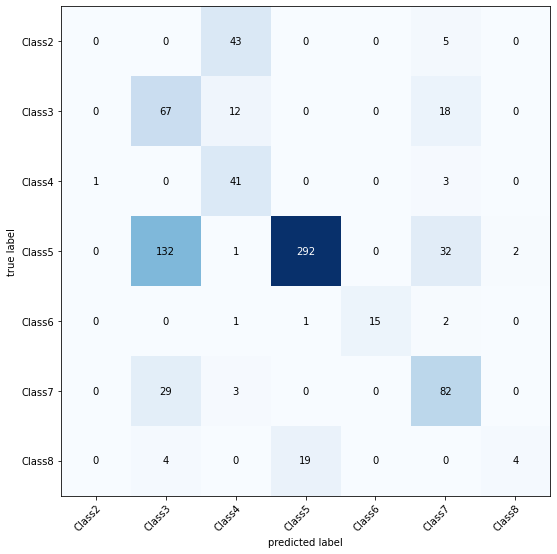

In [12]:
plot_confusion_matrix(conf_mat=matc, figsize=(9,9), class_names = names, show_normed=False)

In [13]:
print(metrics.classification_report(y_real,y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        48
           1     0.2888    0.6907    0.4073        97
           2     0.4059    0.9111    0.5616        45
           3     0.9359    0.6362    0.7575       459
           4     1.0000    0.7895    0.8824        19
           5     0.5775    0.7193    0.6406       114
           6     0.6667    0.1481    0.2424        27

    accuracy                         0.6193       809
   macro avg     0.5535    0.5564    0.4988       809
weighted avg     0.7153    0.6193    0.6289       809

